# Dataset 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('criptodata.csv', header=None)
data.columns = [
    'Date',
    'Name',
    'Symbol',
    'Volume',
    'MarketCap',
    'Price',
    'Cat1',
    'Cat2'
    ]

In [3]:
data.head()

,Date,Name,Symbol,Volume,MarketCap,Price,Cat1,Cat2
0,2025-05-08,NEAR,NEAR,156460509,2.767121e+09,2.284913,0,0
1,2025-05-07,NEAR,NEAR,144885775,2.820097e+09,2.329123,0,0
2,2025-05-06,NEAR,NEAR,144078512,2.803325e+09,2.316457,0,0
3,2025-05-05,NEAR,NEAR,144173682,2.811489e+09,2.323541,0,0
4,2025-05-04,NEAR,NEAR,148361129,2.937361e+09,2.426043,0,0


In [6]:
data = data.drop(['Name', 'Symbol', 'Cat1', 'Cat2'], axis=1)

In [5]:
data.Cat2.unique()

array([0])

In [7]:
data

,Date,Volume,MarketCap,Price
0,2025-05-08,156460509,2.767121e+09,2.284913
1,2025-05-07,144885775,2.820097e+09,2.329123
2,2025-05-06,144078512,2.803325e+09,2.316457
3,2025-05-05,144173682,2.811489e+09,2.323541
4,2025-05-04,148361129,2.937361e+09,2.426043
...,...,...,...,...
1352,2021-08-25,1116147,2.280439e+09,5.167150
1353,2021-08-24,828387,2.417642e+09,5.504823
1354,2021-08-23,116402,2.420253e+09,5.492712
1355,2021-08-22,2314,2.676608e+09,6.139506


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1357 non-null   object 
 1   Volume     1357 non-null   int64  
 2   MarketCap  1357 non-null   float64
 3   Price      1357 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 42.5+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Volume,MarketCap,Price
0,2025-05-08,156460509,2.767121e+09,2.284913
1,2025-05-07,144885775,2.820097e+09,2.329123
2,2025-05-06,144078512,2.803325e+09,2.316457
3,2025-05-05,144173682,2.811489e+09,2.323541
4,2025-05-04,148361129,2.937361e+09,2.426043


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1357 non-null   datetime64[ns]
 1   Volume     1357 non-null   int64         
 2   MarketCap  1357 non-null   float64       
 3   Price      1357 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 42.5 KB


In [ ]:
data.isnull().sum()

,0
Date,0
Volume,0
MarketCap,0
Price,0


In [ ]:
data.duplicated().sum()

np.int64(0)

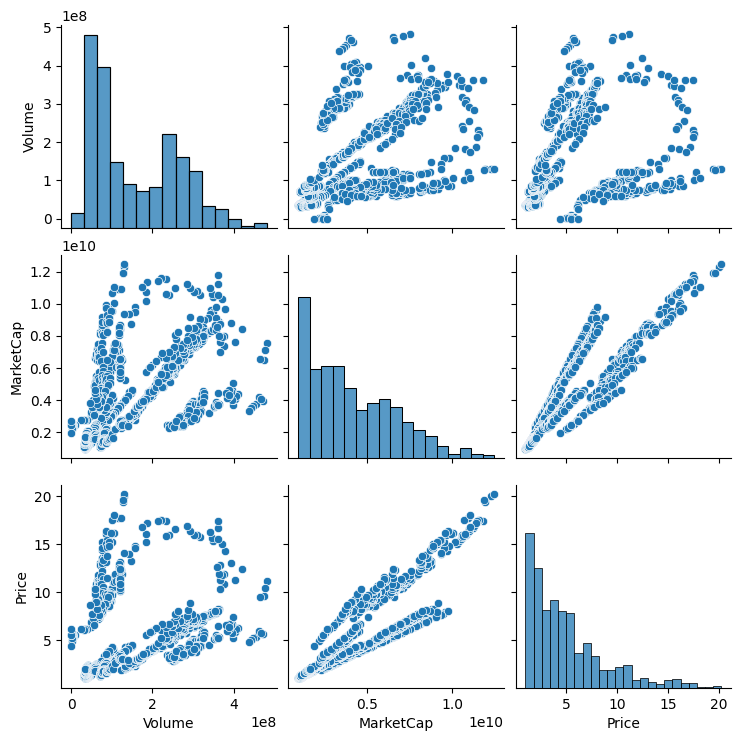

In [ ]:
sns.pairplot(data)

<Axes: >

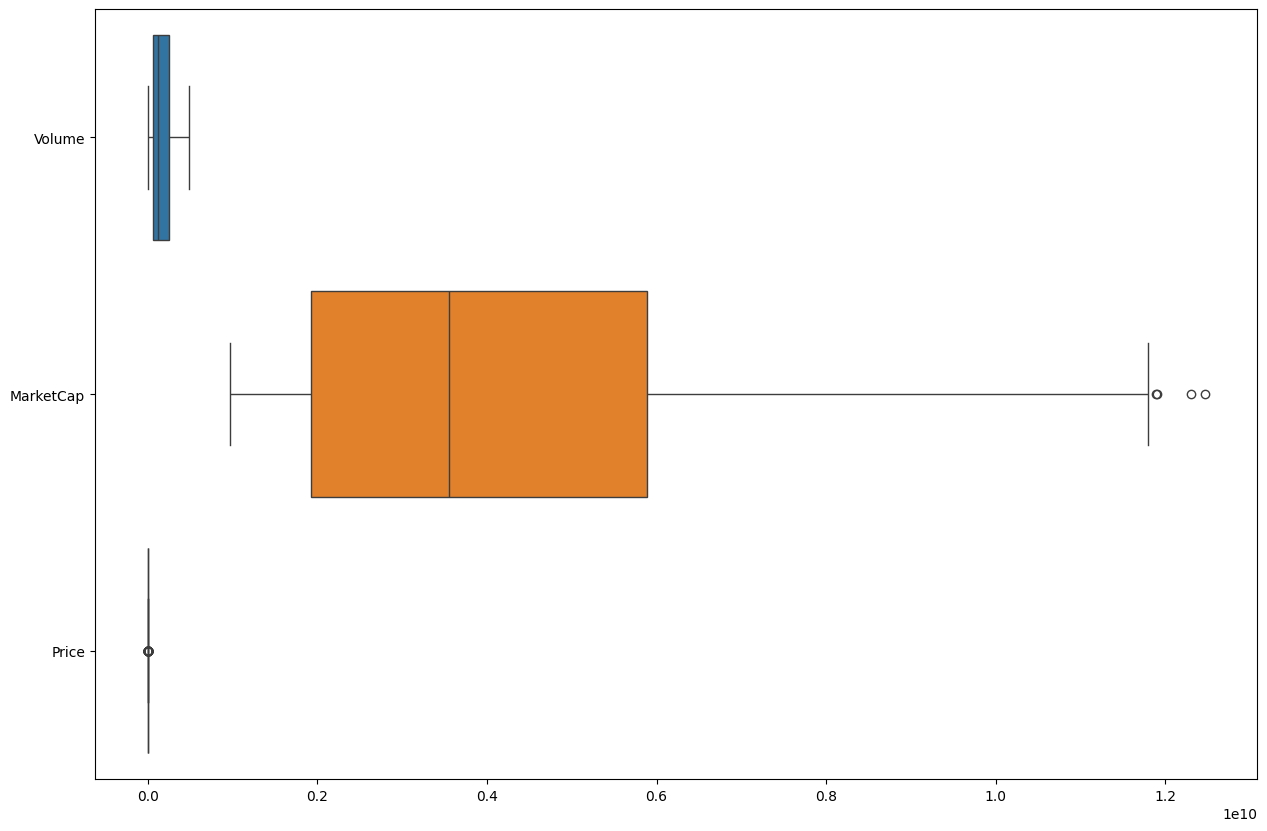

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')

In [9]:
import pandas as pd

def porcentaje_outliers_por_columna(df):
    porcentajes = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
        porcentaje = 100 * len(outliers) / len(df)
        porcentajes[col] = round(porcentaje, 2)
    return pd.Series(porcentajes, name='Porcentaje de Outliers')

print(porcentaje_outliers_por_columna(data))


Volume       0.00
MarketCap    0.29
Price        4.27
Name: Porcentaje de Outliers, dtype: float64


<Axes: >

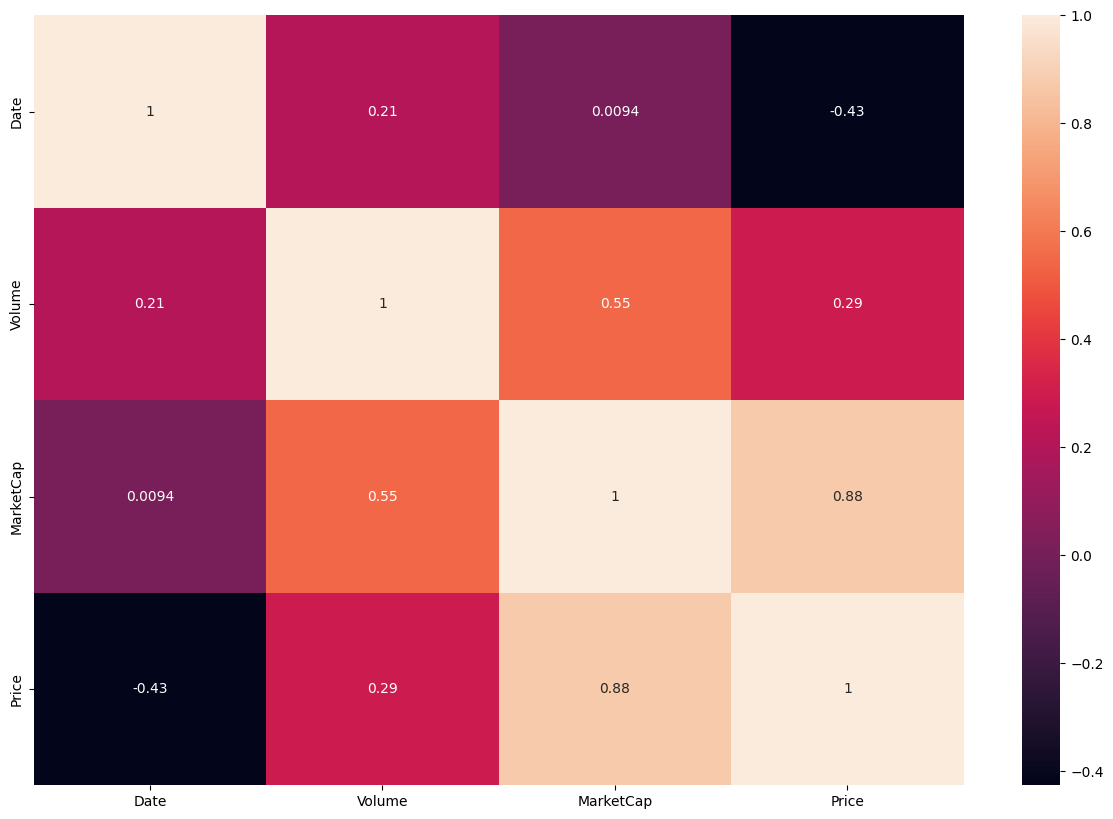

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

# Dataset 2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('criptodata2.csv')

In [ ]:
data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2025-05-10,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2025-05-09,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2025-05-08,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2025-05-07,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2025-05-06,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1669 non-null   object 
 1   End         1669 non-null   object 
 2   Open        1669 non-null   float64
 3   High        1669 non-null   float64
 4   Low         1669 non-null   float64
 5   Close       1669 non-null   float64
 6   Volume      1669 non-null   float64
 7   Market Cap  1669 non-null   float64
dtypes: float64(6), object(2)
memory usage: 104.4+ KB


In [11]:
data['Date'] = pd.to_datetime(data['Start'])
data.insert(0, 'Date', data.pop('Date'))

data.drop(['Start', 'End'], axis=1, inplace=True)

data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1669 non-null   datetime64[ns]
 1   Open        1669 non-null   float64       
 2   High        1669 non-null   float64       
 3   Low         1669 non-null   float64       
 4   Close       1669 non-null   float64       
 5   Volume      1669 non-null   float64       
 6   Market Cap  1669 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 91.4 KB


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0


In [ ]:
data.duplicated().sum()

np.int64(0)

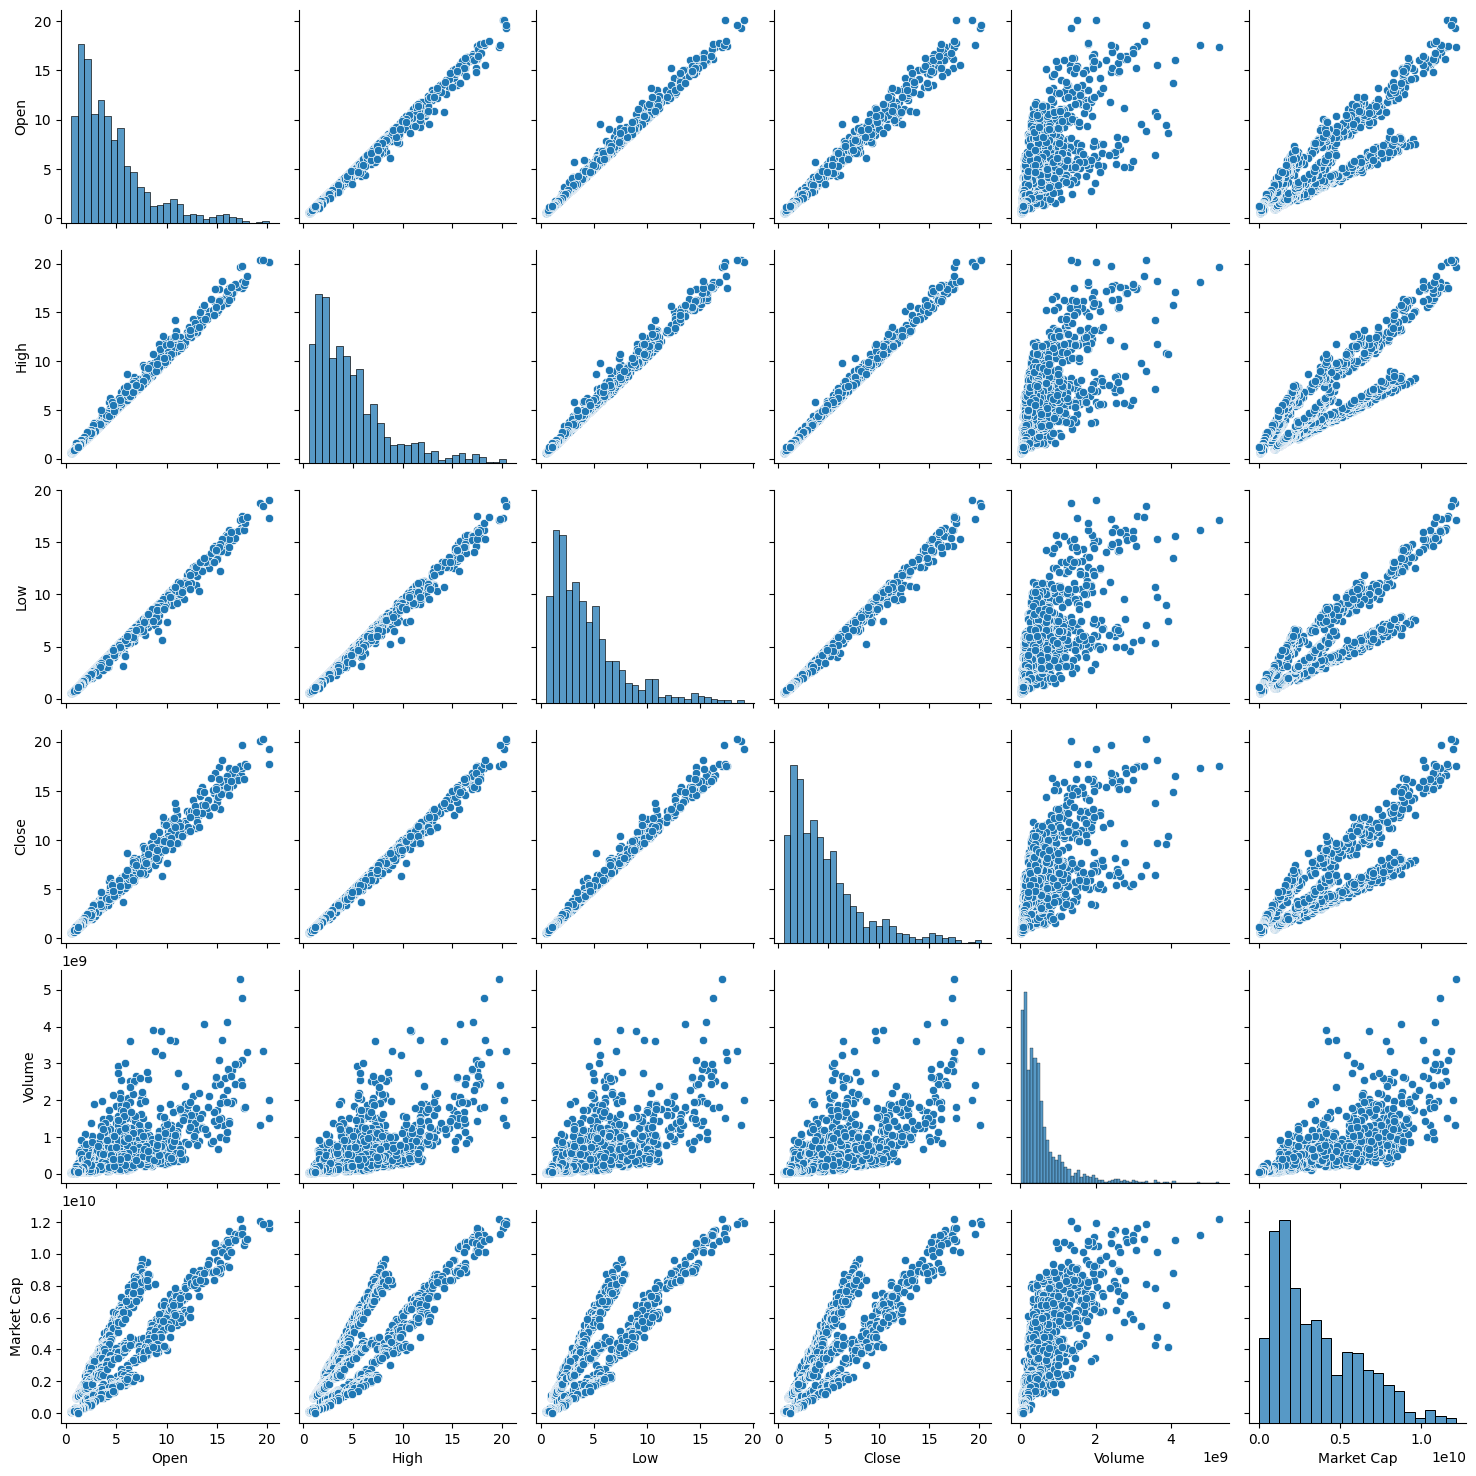

In [ ]:
sns.pairplot(data)

<Axes: >

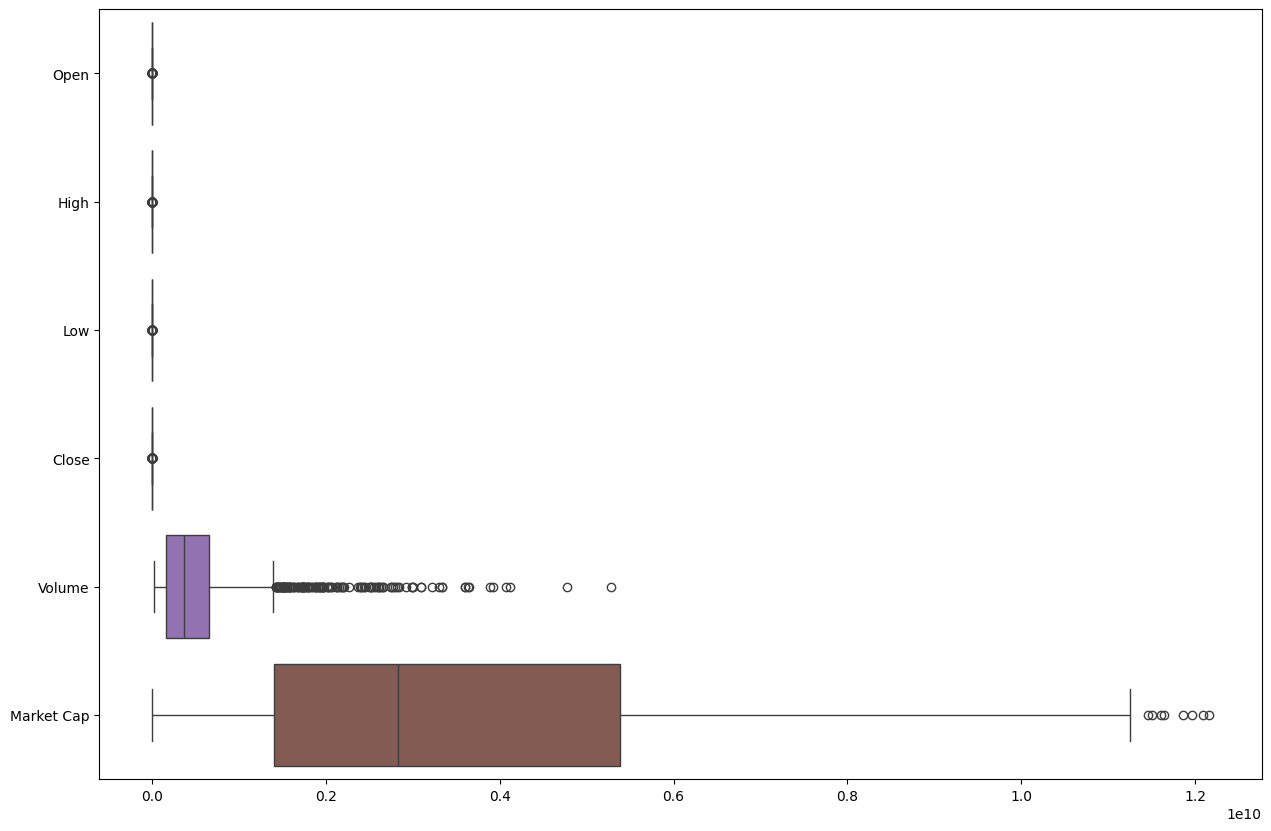

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')

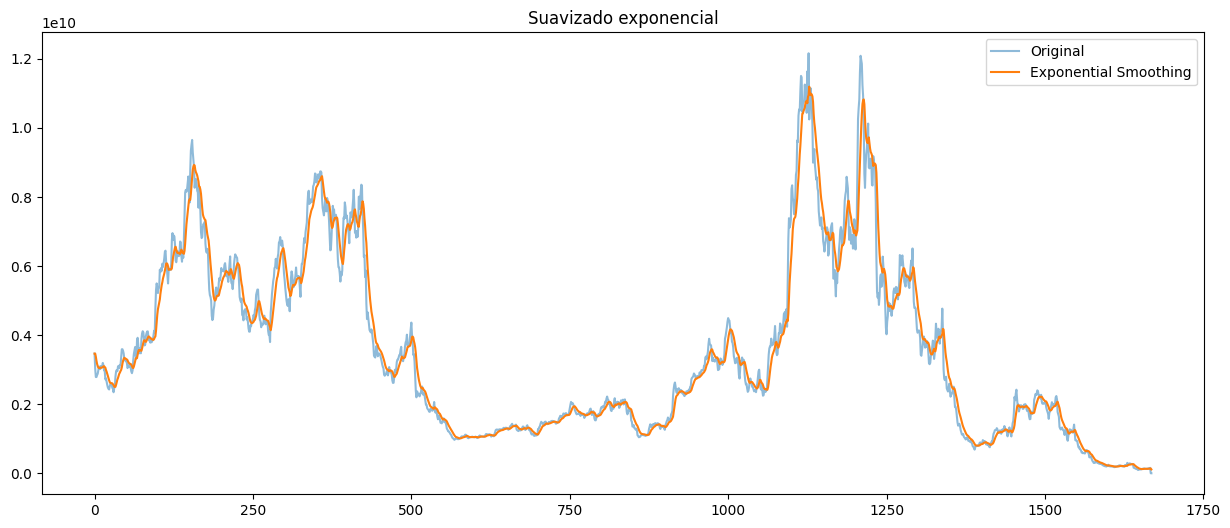

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(data['Market Cap']).fit(smoothing_level=0.2, optimized=False)
data['Market Cap Smooth'] = ses_model.fittedvalues


plt.figure(figsize=(15, 6))
plt.plot(data['Market Cap'], label='Original', alpha=0.5)
plt.plot(data['Market Cap Smooth'], label='Exponential Smoothing')
plt.legend()
plt.title('Suavizado exponencial')
plt.show()

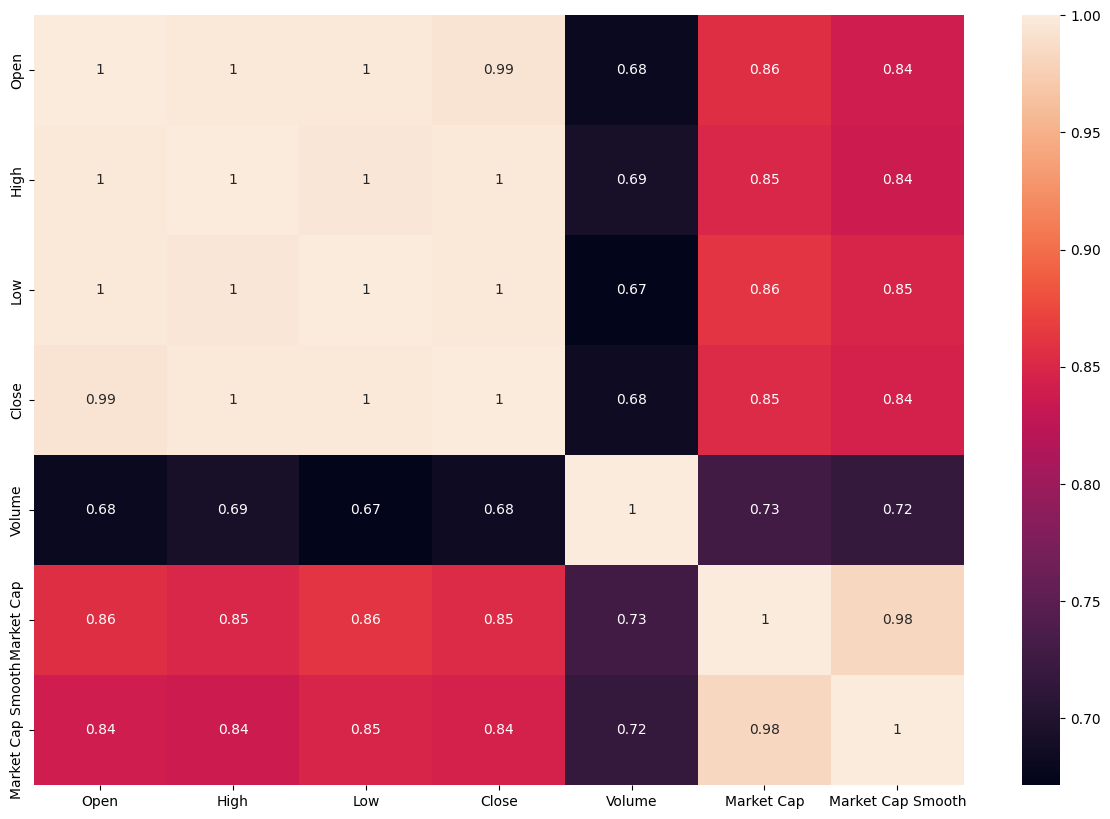

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('Date', axis=1).corr(), annot=True)
plt.show()

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Smooth
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09,3.465271e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09,3.378296e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09,3.260106e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09,3.165528e+09
...,...,...,...,...,...,...,...,...
1664,2020-10-18,0.808574,0.871469,0.802287,0.871016,4.591787e+07,1.448164e+08,1.317836e+08
1665,2020-10-17,0.817904,0.857013,0.726276,0.808040,8.097295e+07,1.382133e+08,1.343902e+08
1666,2020-10-16,1.125216,1.148851,0.813440,0.817802,6.120328e+07,1.562425e+08,1.351548e+08
1667,2020-10-15,1.167162,1.240177,1.086936,1.124783,4.739661e+07,0.000000e+00,1.393723e+08


<Axes: >

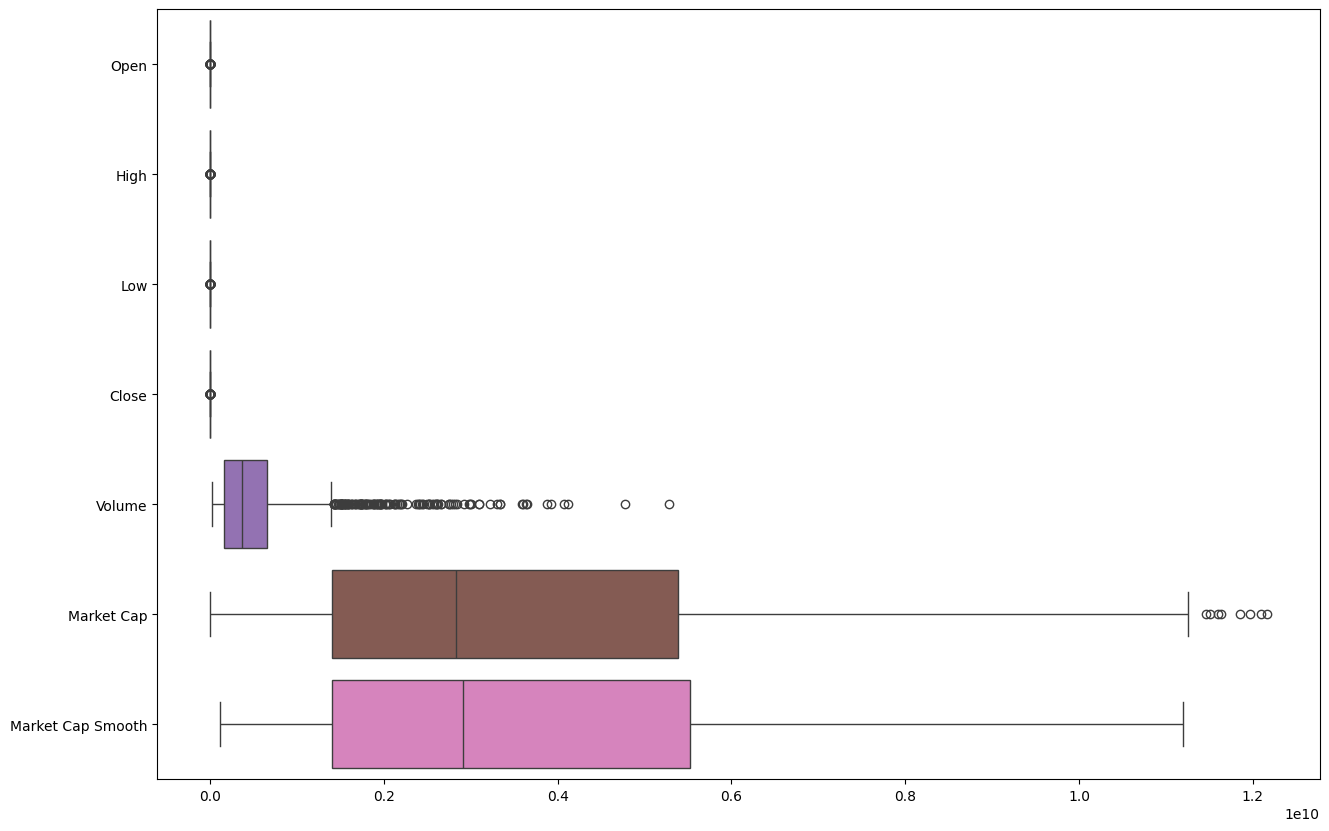

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')

In [12]:
print(porcentaje_outliers_por_columna(data))


Open          4.73
High          5.15
Low           4.43
Close         4.91
Volume        7.91
Market Cap    0.48
Name: Porcentaje de Outliers, dtype: float64


In [13]:

def variables_con_correlacion_alta(df, umbral=0.6):
    corr_matrix = df.corr(numeric_only=True)
    correlaciones_altas = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > umbral:
                correlaciones_altas.append((col1, col2, round(corr_value, 3)))

    return pd.DataFrame(correlaciones_altas, columns=['Variable 1', 'Variable 2', 'Correlación'])

print(variables_con_correlacion_alta(data, umbral=0.6))


   Variable 1  Variable 2  Correlación
0        Open        High        0.997
1        Open         Low        0.997
2        Open       Close        0.993
3        Open      Volume        0.680
4        Open  Market Cap        0.855
5        High         Low        0.996
6        High       Close        0.997
7        High      Volume        0.693
8        High  Market Cap        0.850
9         Low       Close        0.996
10        Low      Volume        0.671
11        Low  Market Cap        0.861
12      Close      Volume        0.684
13      Close  Market Cap        0.854
14     Volume  Market Cap        0.728
